**Aplicar os conceitos de estatística trabalhados durante toda a unidade curricular no arquivo orientado pelo instrutor**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('BaseDPEvolucaoMensalCisp.csv', encoding='iso-8859-1', sep=";") #Leitura do dataset

In [ ]:
display(dados.head())
display(dados.describe())
dados_copia=dados.copy()


In [ ]:
crimes = ['hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
          'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco', 'roubo_cx_eletronico',
          'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta',
          'outros_furtos', 'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'recuperacao_veiculos',
          'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas', 'encontro_cadaver',
          'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv','registro_ocorrencias']

In [ ]:
# Dicionários para armazenar as estatísticas e a confiabilidade
somas_crimes = {}
medias_crimes = {}
medianas_crimes = {}
distancias_media_mediana = {}
confiabilidade_resultados = {}
intervalo_interquartil = {}
outliers_dicionario = {}
iqr_values = {}
q1_values = {}
q2_values = {}
q3_values = {}
limite_superior_values = {}
limite_inferior_values = {}
variancias_values = {}
desvios_padrao_values = {}
maximos_values = {}
minimos_values = {}
amplitudes_values = {}
assimetria_crimes = {}
curtose_crimes = {}
resultado_curtose = {}
resultado_assimetria = {}
distancia_variancia = {}
distancia_variancia_media = {}

# Definição dos limites para avaliação da confiabilidade
limite_baixo = 10
limite_moderado = 25

In [33]:
# Itera apenas nas colunas da lista 'crimes'
for crime in crimes:
    if crime in dados.columns:
        # Cálculo das estatísticas básicas
        somas_crimes[crime] = dados[crime].sum()
        medias_crimes[crime] = dados[crime].mean()
        medianas_crimes[crime] = dados[crime].median()
        variancia = dados[crime].var()

        # Cálculo dos quartis
        q1 = np.percentile(dados[crime], 25)
        q2 = np.percentile(dados[crime], 50)  # Mediana, que é o Q2
        q3 = np.percentile(dados[crime], 75)

        # Armazenamento dos quartis
        q1_values[crime] = q1
        q2_values[crime] = q2  # Armazenando Q2
        q3_values[crime] = q3

        # Cálculo do IQR e dos limites
        iqr = q3 - q1
        limite_superior = q3 + (1.5 * iqr)
        limite_inferior = q1 - (1.5 * iqr)

        # Armazenamento nos dicionários
        iqr_values[crime] = iqr
        limite_superior_values[crime] = limite_superior
        limite_inferior_values[crime] = limite_inferior

        # Calculando a assimetria (skewness)
        assimetria_crimes[crime] = dados[crime].skew()

        # Calculando a curtose
        curtose_crimes[crime] = dados[crime].kurtosis()

        # Identificação de outliers (agora mostra somente os valores que são outliers)
        outliers = [x for x in dados[crime] if x < limite_inferior or x > limite_superior]
        if outliers:
            outliers_dicionario[crime] = f"Outliers identificados: {outliers}"
        else:
            outliers_dicionario[crime] = "Não há presença de outliers"

        # Distância da variância em relação à média
        distancia_variancia[crime] = variancia - medias_crimes[crime]

        # Cálculo da distância percentual entre média e mediana
        if medianas_crimes[crime] != 0:
            distancia = (medias_crimes[crime] - medianas_crimes[crime]) / medianas_crimes[crime] * 100
            distancias_media_mediana[crime] = distancia
        else:
            distancia = float('inf')  # Evita divisão por zero
            distancias_media_mediana[crime] = distancia

        # Avaliação da confiabilidade
        if distancias_media_mediana[crime] <= limite_baixo:
            confiabilidade_resultados[crime] = "Confiável"
        elif limite_baixo < distancias_media_mediana[crime] <= limite_moderado:
            confiabilidade_resultados[crime] = "Influência Moderada"
        else:
            confiabilidade_resultados[crime] = "Alta Influência de Valores Extremos"

        # Avaliação do intervalo interquartil
        if q1 <= medias_crimes[crime] <= q3:
            intervalo_interquartil[crime] = "Dentro do intervalo interquartil"
        else:
            intervalo_interquartil[crime] = "Fora do intervalo interquartil"

        # Cálculo da variância e desvio padrão
        variancias_values[crime] = dados[crime].var()
        desvios_padrao_values[crime] = dados[crime].std()

        # Medidas de dispersão: valor máximo, valor mínimo e amplitude
        valor_maximo = dados[crime].max()
        valor_minimo = dados[crime].min()
        amplitude_total = valor_maximo - valor_minimo

        # Armazenamento das medidas de dispersão
        maximos_values[crime] = valor_maximo
        minimos_values[crime] = valor_minimo
        amplitudes_values[crime] = amplitude_total

        # Avaliação da Assimetria
        if -0.5 <= assimetria_crimes[crime] <= 0.5:
            resultado_assimetria[crime] = "Distribuição Simétrica"
        elif assimetria_crimes[crime] > 0.5:
            resultado_assimetria[crime] = "Distribuição Assimétrica Positiva"
        else:
            resultado_assimetria[crime] = "Distribuição Assimétrica Negativa"

        # Avaliação da Curtose
        if 2.5 <= curtose_crimes[crime] <= 3.5:
            resultado_curtose[crime] = "Distribuição Mesocúrtica"
        elif curtose_crimes[crime] < 2.5:
            resultado_curtose[crime] = "Distribuição Platicúrtica"
        else:
            resultado_curtose[crime] = "Distribuição Leptocúrtica"

    else:
        print(f"Coluna '{crime}' não encontrada no DataFrame.")
        confiabilidade_resultados[crime] = None  # Define como None se a coluna não existir


In [34]:
# Criar DataFrame para exibir as estatísticas e a confiabilidade dos crimes
df_estatisticas_crimes = pd.DataFrame({
    'Crime': medias_crimes.keys(),
    'Soma Crimes': list(somas_crimes.values()),
    'Média': medias_crimes.values(),
    'Mediana': medianas_crimes.values(),
    'Distância Média - Mediana (%)': [f"{dist:.1f}%" for dist in distancias_media_mediana.values()],
    'Primeiro Quartil (Q1)': q1_values.values(),
    'Segundo Quartil (Q2)': q2_values.values(),  # Exibindo o Q2
    'Terceiro Quartil (Q3)': q3_values.values(),
    'IQR': iqr_values.values(),
    'Intervalo Interquartil': intervalo_interquartil.values(),
    'Limite Superior': limite_superior_values.values(),
    'Limite Inferior': limite_inferior_values.values(),
    'Confiabilidade': confiabilidade_resultados.values(),
    'Outliers': outliers_dicionario.values(),
    'Variância': variancias_values.values(),
    'Distância Variância-Média': distancia_variancia.values(),
    'Desvio Padrão': desvios_padrao_values.values(),
    'Valor Máximo': maximos_values.values(),
    'Valor Mínimo': minimos_values.values(),
    'Amplitude': amplitudes_values.values(),
    'Assimetria': assimetria_crimes.values(),
    'Curtose': curtose_crimes.values(),
    'Distribuição de Assimetria': resultado_assimetria.values(),
    'Distribuição de Curtose': resultado_curtose.values(),
})

# Exibir o DataFrame
display(df_estatisticas_crimes)

,Crime,Soma Crimes,Média,Mediana,Distância Média - Mediana (%),Primeiro Quartil (Q1),Segundo Quartil (Q2),Terceiro Quartil (Q3),IQR,Intervalo Interquartil,...,Variância,Distância Variância-Média,Desvio Padrão,Valor Máximo,Valor Mínimo,Amplitude,Assimetria,Curtose,Distribuição de Assimetria,Distribuição de Curtose
0,hom_doloso,105293.0,2.997922,1.0,199.8%,0.0,1.0,4.0,4.0,Dentro do intervalo interquartil,...,19.395486,16.397564,4.404031,43.0,0.0,43.0,2.542326,8.436717,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
1,lesao_corp_morte,956.0,0.027219,0.0,inf%,0.0,0.0,0.0,0.0,Fora do intervalo interquartil,...,0.031320,0.004100,0.176974,6.0,0.0,6.0,7.990860,97.441829,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
2,latrocinio,3436.0,0.097830,0.0,inf%,0.0,0.0,0.0,0.0,Fora do intervalo interquartil,...,0.137805,0.039975,0.371221,9.0,0.0,9.0,5.304967,45.390899,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
3,cvli,109685.0,3.122971,1.0,212.3%,0.0,1.0,4.0,4.0,Dentro do intervalo interquartil,...,20.435406,17.312434,4.520554,43.0,0.0,43.0,2.505000,8.164871,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
4,hom_por_interv_policial,22053.0,0.627897,0.0,inf%,0.0,0.0,0.0,0.0,Fora do intervalo interquartil,...,2.479997,1.852100,1.574801,27.0,0.0,27.0,4.225258,26.769514,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
5,letalidade_violenta,131738.0,3.750868,2.0,87.5%,0.0,2.0,5.0,5.0,Dentro do intervalo interquartil,...,28.417018,24.666150,5.330762,52.0,0.0,52.0,2.384878,7.225932,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
6,tentat_hom,100487.0,2.861084,1.0,186.1%,0.0,1.0,4.0,4.0,Dentro do intervalo interquartil,...,15.972701,13.111617,3.996586,59.0,0.0,59.0,2.672669,11.778268,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
7,lesao_corp_dolosa,1570177.0,44.706366,33.0,35.5%,15.0,33.0,61.0,46.0,Dentro do intervalo interquartil,...,1800.769476,1756.063109,42.435474,370.0,0.0,370.0,2.153111,6.692991,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
8,estupro,101275.0,2.883520,2.0,44.2%,0.0,2.0,4.0,4.0,Dentro do intervalo interquartil,...,13.140927,10.257406,3.625042,73.0,0.0,73.0,2.532798,12.625940,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica
9,hom_culposo,48979.0,1.394539,1.0,39.5%,0.0,1.0,2.0,2.0,Dentro do intervalo interquartil,...,3.618629,2.224090,1.902269,23.0,0.0,23.0,2.212610,7.456116,Distribuição Assimétrica Positiva,Distribuição Leptocúrtica


In [ ]:
#Análise
top_10_crimes = sorted(somas_crimes.items(), key=lambda x: x[1], reverse=True)[:10]

# Exibindo os 10 crimes com mais ocorrências
print("Os 10 crimes com mais ocorrências são:")
for crime, soma in top_10_crimes:
    print(f"{crime}: {soma} ocorrências")

In [ ]:
# Agrupa os dados por 'aisp' (delegacia) e soma todas as colunas de crimes
crimes_por_delegacia = dados.groupby('aisp')[crimes].sum()

# Calcula a soma total de todos os crimes por delegacia
crimes_por_delegacia['total_crimes'] = crimes_por_delegacia.sum(axis=1)

# Exibe a soma total de todos os crimes por delegacia
print("\nSoma total de todos os crimes por delegacia:")
display(crimes_por_delegacia[['total_crimes']])

In [ ]:
# Mapeamento de crimes para suas respectivas categorias
categoria_crimes = {
    'Crimes Violentos e Homicídios': [
        'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial',
        'letalidade_violenta', 'tentat_hom', 'hom_culposo'
    ],
    'Crimes Sexuais': ['estupro'],
    'Crimes Contra o Patrimônio': [
        'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo',
        'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco', 'roubo_cx_eletronico',
        'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
        'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta',
        'outros_furtos', 'total_furtos', 'sequestro', 'extorsao'
    ],
    'Crimes de Drogas': ['apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor'],
    'Crimes de Tráfico e Apreensão': ['recuperacao_veiculos'],
    'Crimes Processuais e de Prisão': ['apf', 'aaapai', 'cmp', 'cmba'],
    'Crimes de Ameaça e Violência Psicológica': ['ameaca', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada'],
    'Crimes Contra Policiais': ['pol_militares_mortos_serv', 'pol_civis_mortos_serv'],
    'Crimes Econômicos': ['estelionato'],
    'Outros Crimes': ['registro_ocorrencias']
}

# Calcula o total de crimes para cada categoria
totais_por_categoria = {}

# Percorre as categorias e soma os crimes para cada categoria
for categoria, crimes_list in categoria_crimes.items():
    # Soma os valores dos crimes dessa categoria
    totais_por_categoria[categoria] = int(dados[crimes_list].sum().sum())

# Exibe os totais de cada categoria
totais_categoria_df = pd.DataFrame(totais_por_categoria.items(), columns=['Categoria', 'Total de Crimes'])
print("\nTotal de Crimes por Categoria:")
display(totais_categoria_df)

In [35]:
# Cria um DataFrame para armazenar os totais de crimes por categoria, mês e ano
totais_mensais_por_categoria = pd.DataFrame()

# Loop por cada categoria e soma os crimes mensais e anuais
for categoria, crimes_list in categoria_crimes.items():
    # Soma os valores dos crimes da categoria por mês e ano
    totais_categoria = dados.groupby(['ano', 'mes'])[crimes_list].sum().sum(axis=1)
    
    # Armazena os resultados na estrutura de dados
    totais_mensais_por_categoria[categoria] = totais_categoria

# Resetando o índice para que 'ano' e 'mes' se tornem colunas
totais_mensais_por_categoria = totais_mensais_por_categoria.reset_index()

# Exibe o DataFrame resultante
print("\nTotal de Crimes por Categoria, Mês e Ano:")
display(totais_mensais_por_categoria)


Total de Crimes por Categoria, Mês e Ano:


,ano,mes,Crimes Violentos e Homicídios,Crimes Sexuais,Crimes Contra o Patrimônio,Crimes de Drogas,Crimes de Tráfico e Apreensão,Crimes Processuais e de Prisão,Crimes de Ameaça e Violência Psicológica,Crimes Contra Policiais,Crimes Econômicos,Outros Crimes
0,2003,1,2553,245,44634.0,1003.0,2725,0.0,6683,5,885,44793
1,2003,2,2568,221,45156.0,1159.0,2678,0.0,6663,2,802,45403
2,2003,3,2648,236,45136.0,1133.0,2670,0.0,6418,8,821,45417
3,2003,4,2584,215,44466.0,1061.0,2703,0.0,6096,5,819,44184
4,2003,5,2676,189,45930.0,1019.0,2960,0.0,6004,5,874,45572
...,...,...,...,...,...,...,...,...,...,...,...,...
256,2024,5,1596,511,54599.0,4384.0,1392,5943.0,6682,3,12930,79511
257,2024,6,1434,507,49723.0,4657.0,1419,5731.0,6075,2,12611,75288
258,2024,7,1296,471,50148.0,4347.0,1427,5394.0,5935,3,13032,75380
259,2024,8,1367,481,53857.0,4121.0,1656,5101.0,6200,0,12853,78652


In [36]:
totais_por_categoria = pd.DataFrame()

# Loop por cada categoria e soma os crimes por ano, mês, região e delegacia
for categoria, crimes_list in categoria_crimes.items():
    # Soma os valores dos crimes da categoria por ano, mês, região e delegacia
    totais_categoria = dados.groupby(['ano', 'mes', 'munic', 'aisp'])[crimes_list].sum().sum(axis=1)
    
    # Armazena os resultados na estrutura de dados
    totais_por_categoria[categoria] = totais_categoria

# Resetando o índice para que 'ano', 'mes', 'regiao', e 'cisp' se tornem colunas
totais_por_categoria = totais_por_categoria.reset_index()

# Exibe o DataFrame resultante
print("\nTotal de Crimes por Categoria, Ano, Mês, Região e Delegacia:")
display(totais_por_categoria)


Total de Crimes por Categoria, Ano, Mês, Região e Delegacia:


,ano,mes,munic,aisp,Crimes Violentos e Homicídios,Crimes Sexuais,Crimes Contra o Patrimônio,Crimes de Drogas,Crimes de Tráfico e Apreensão,Crimes Processuais e de Prisão,Crimes de Ameaça e Violência Psicológica,Crimes Contra Policiais,Crimes Econômicos,Outros Crimes
0,2003,1,Angra dos Reis,32,33,4,265.0,79.0,2,0.0,124,0,3,496
1,2003,1,Araruama,25,14,4,260.0,2.0,6,0.0,37,0,6,301
2,2003,1,Armação dos Búzios,25,35,2,266.0,7.0,6,0.0,28,0,3,269
3,2003,1,Barra Mansa,28,14,2,197.0,6.0,6,0.0,69,0,1,275
4,2003,1,Barra do Pirai,10,8,2,59.0,8.0,1,0.0,22,0,3,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25306,2024,9,Teresópolis,30,14,6,168.0,121.0,3,84.0,96,0,112,751
25307,2024,9,Trajano de Morais,11,4,1,4.0,2.0,0,1.0,0,0,2,32
25308,2024,9,Valença,10,3,1,32.0,74.0,1,24.0,30,0,18,240
25309,2024,9,Vassouras,10,3,1,22.0,34.0,0,11.0,42,0,18,165


Total de crimes entre 2020 e 2024: 7985753.0


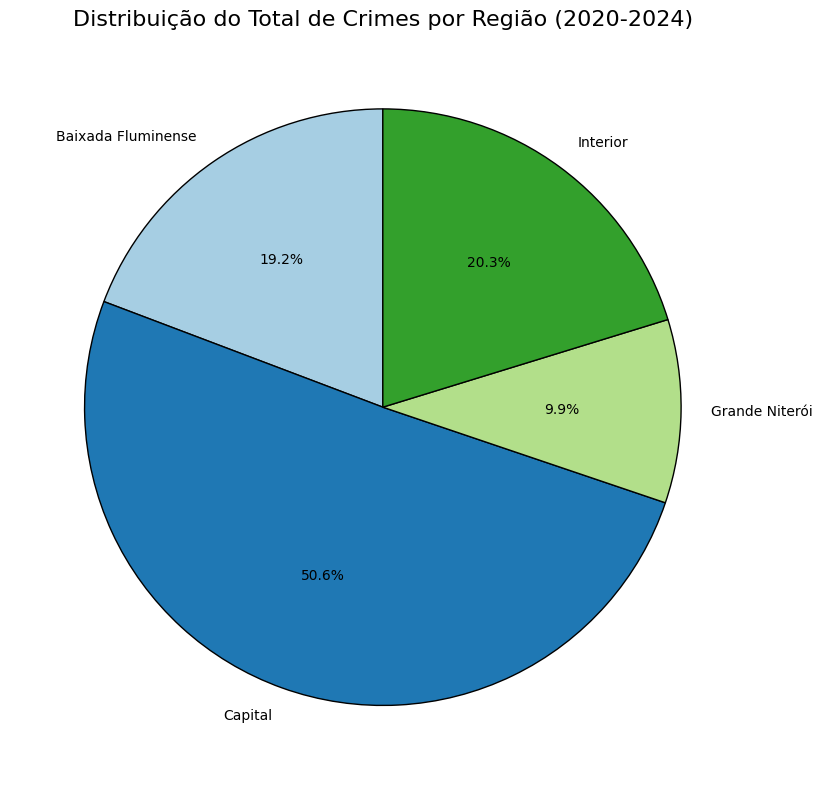

In [37]:
# Agrupa os dados pelo total de crimes em cada região
totais_por_regiao = dados.groupby('regiao')[crimes].sum(numeric_only=True).sum(axis=1)

# Plotando o gráfico de pizza para mostrar a distribuição do total de crimes por região
plt.figure(figsize=(10, 8))
plt.pie(
    totais_por_regiao, 
    labels=totais_por_regiao.index, 
    autopct='%1.1f%%',  # Exibe a porcentagem com uma casa decimal
    startangle=90,      # Começa o gráfico de pizza em 90 graus
    colors=plt.cm.Paired.colors,  # Escolhe uma paleta de cores agradável
    wedgeprops={'edgecolor': 'black'}  # Adiciona bordas pretas para destacar cada fatia
)
dados_filtrados = dados[dados['ano'].between(2020, 2024)]

# Somando todos os crimes de 2020 a 2024
total_crimes_2020_2024 = dados_filtrados[crimes].sum().sum()


print(f"Total de crimes entre 2020 e 2024: {total_crimes_2020_2024}")
plt.title("Distribuição do Total de Crimes por Região (2020-2024)", fontsize=16)
plt.tight_layout()
plt.show()